## Problem Statement
This project understands how the student's performance  is affected by other variables in the dataset festure



### Import Dataset and required pakcages

In [51]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV file as pandas DataFrame

In [2]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# shape of the dataset
df.shape

(1000, 8)

### Data checks to perform

- check missing values
- check duplicates
- check data types
- check number of unique values of each column
- check statistic of dataset

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# check the number of unique values of eaach column

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

check statistic of Dataset

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring Data

In [11]:
print("Categories in 'Gender' variable :",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable :",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable :",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable :",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable :",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'Gender' variable : ['female' 'male']
Categories in 'race_ethnicity' variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable : ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable : ['none' 'completed']


In [12]:
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']
catogerical_features=[feature for feature in df.columns if df[feature].dtype =='O']

print("We have {} numerical features : {}".format(len(numerical_features),numerical_features))
print("We have {} categorical features : {}".format(len(catogerical_features),catogerical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


Adding columns for "Total Score" and "Average"

In [15]:
df["Total Score"]=df['math_score']+df['reading_score']+df['writing_score']
df["Average"]=df['Total Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full=df[df['reading_score']==100]['Average'].count()
writing_full=df[df['writing_score']==100]['Average'].count()
math_full=df[df['math_score']==100]['Average'].count()

print(f"Number of students with full marks for Maths : {math_full}")
print(f"Number of students with full marks for Reading : {reading_full}")
print(f"Number of students with full marks for Writing : {writing_full}")

Number of students with full marks for Maths : 7
Number of students with full marks for Reading : 17
Number of students with full marks for Writing : 14


In [17]:
reading_less_30=df[df['reading_score']<=30]["Average"].count()
writing_less_30=df[df['writing_score']<=30]["Average"].count()
math_less_30=df[df['math_score']<=30]["Average"].count()

print (f"Number of students with less than 30 marks for Maths : {math_less_30}")
print (f"Number of students with less than 30 marks for Writing : {writing_less_30}")
print (f"Number of students with less than 30 marks for Reading : {reading_less_30}")

Number of students with less than 30 marks for Maths : 16
Number of students with less than 30 marks for Writing : 10
Number of students with less than 30 marks for Reading : 8


EDA 
- Histogram
- Kernel Distribution Function(KDF)

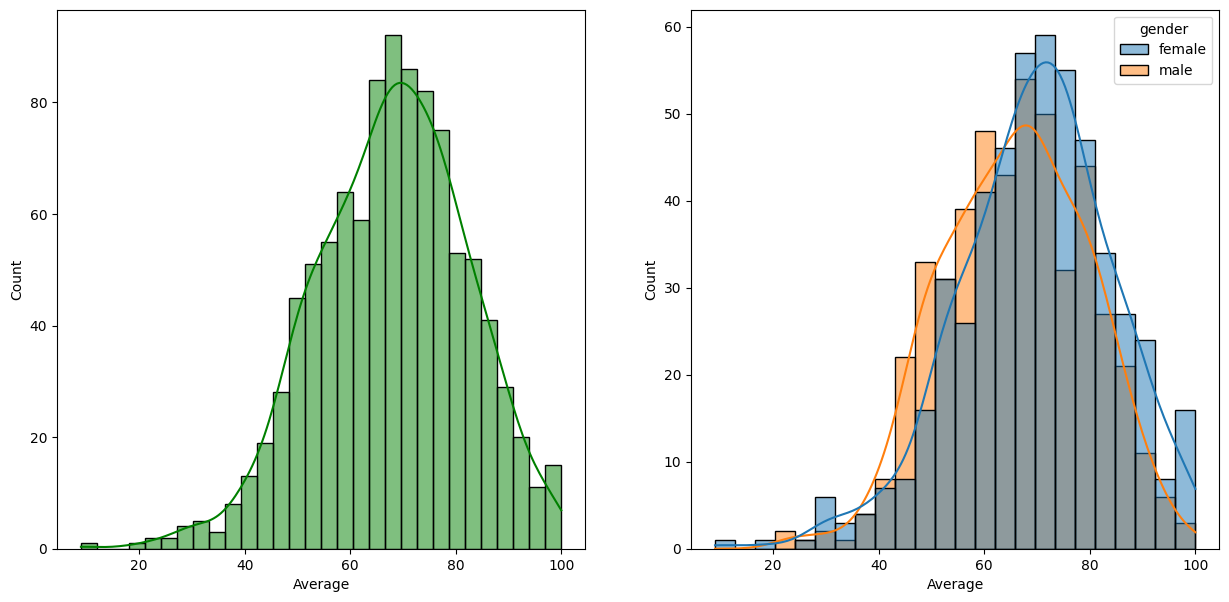

In [25]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()


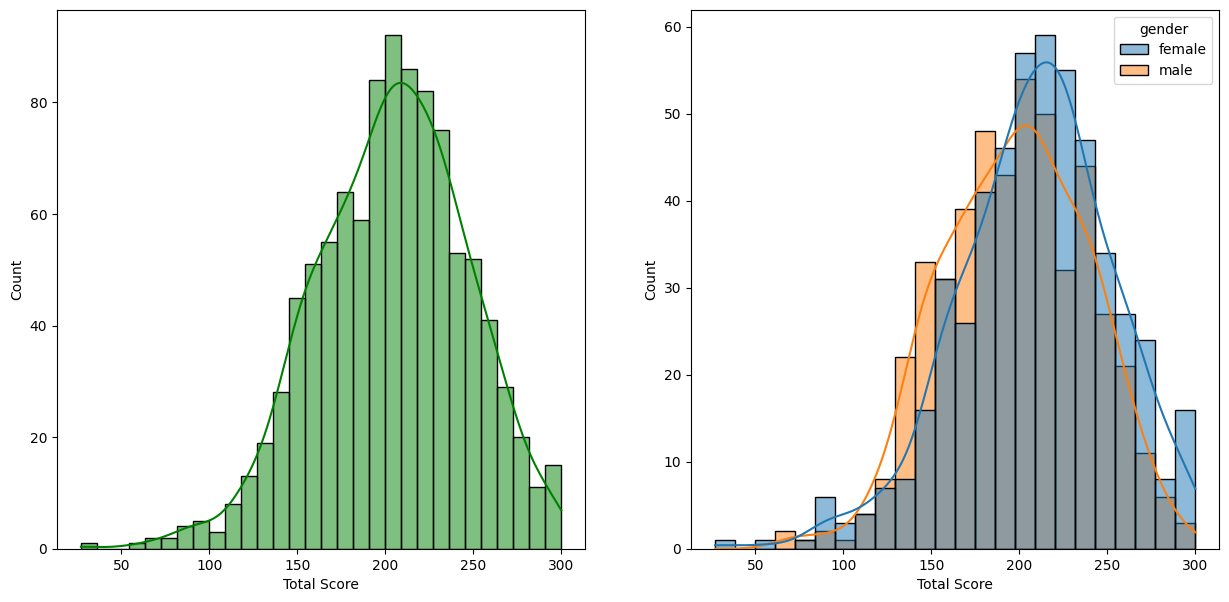

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total Score', bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Score',kde=True,hue='gender')
plt.show()

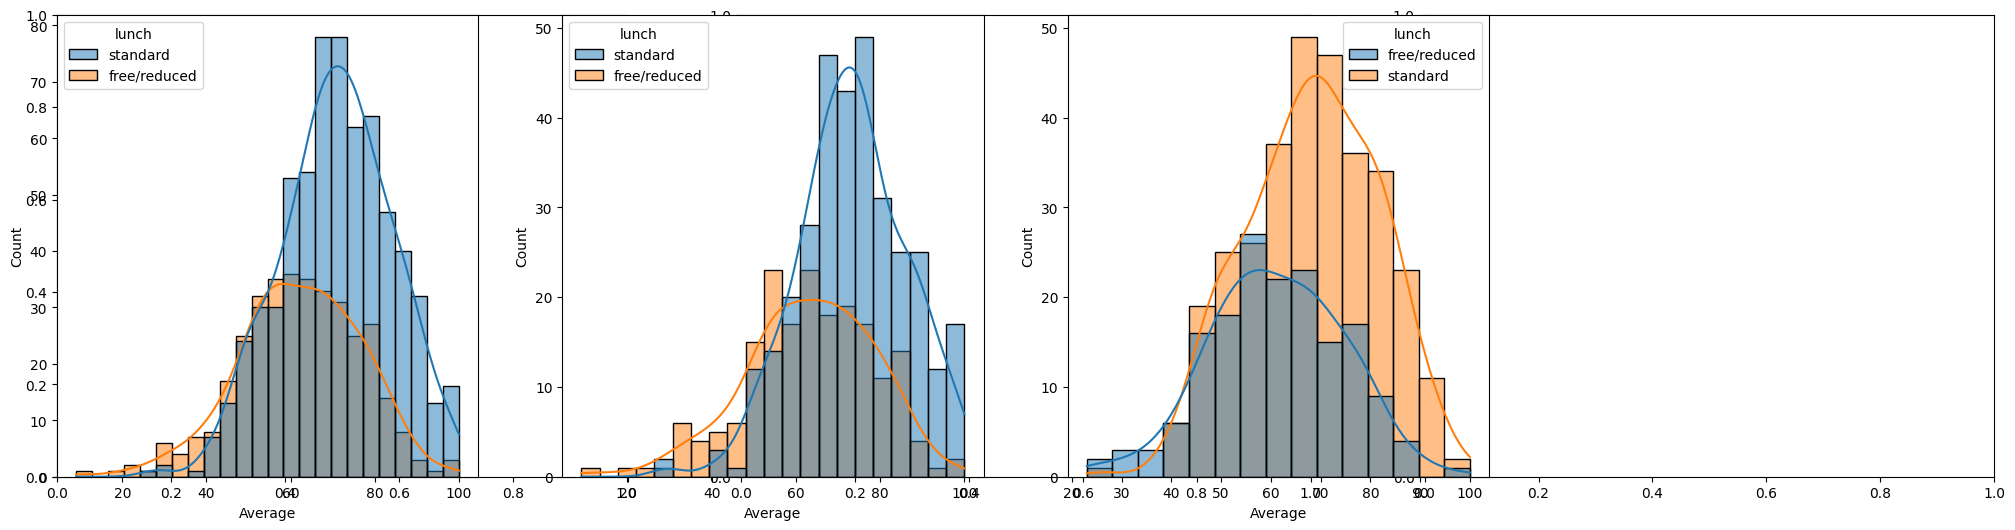

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="Average",kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="Average",kde=True,hue="lunch")
plt.show()

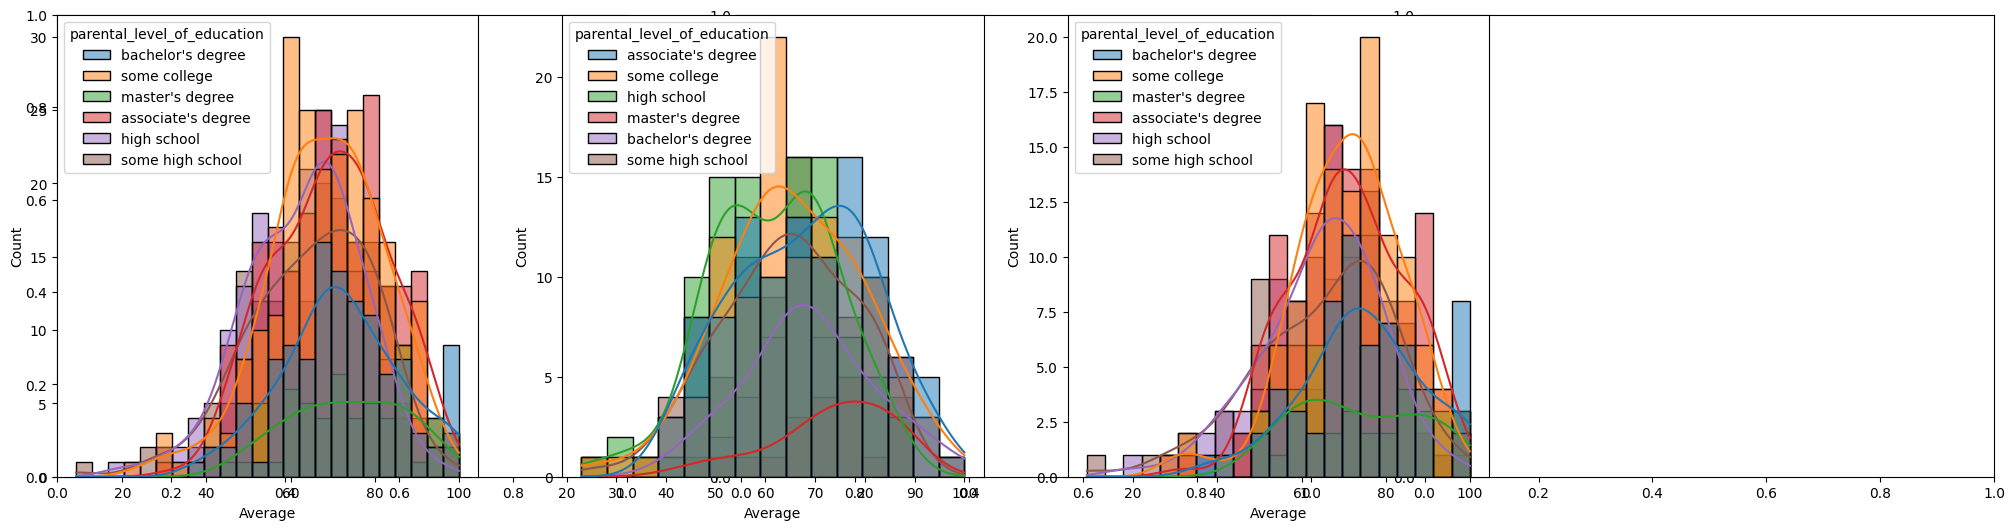

In [35]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

In [33]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total Score', 'Average'],
      dtype='object')

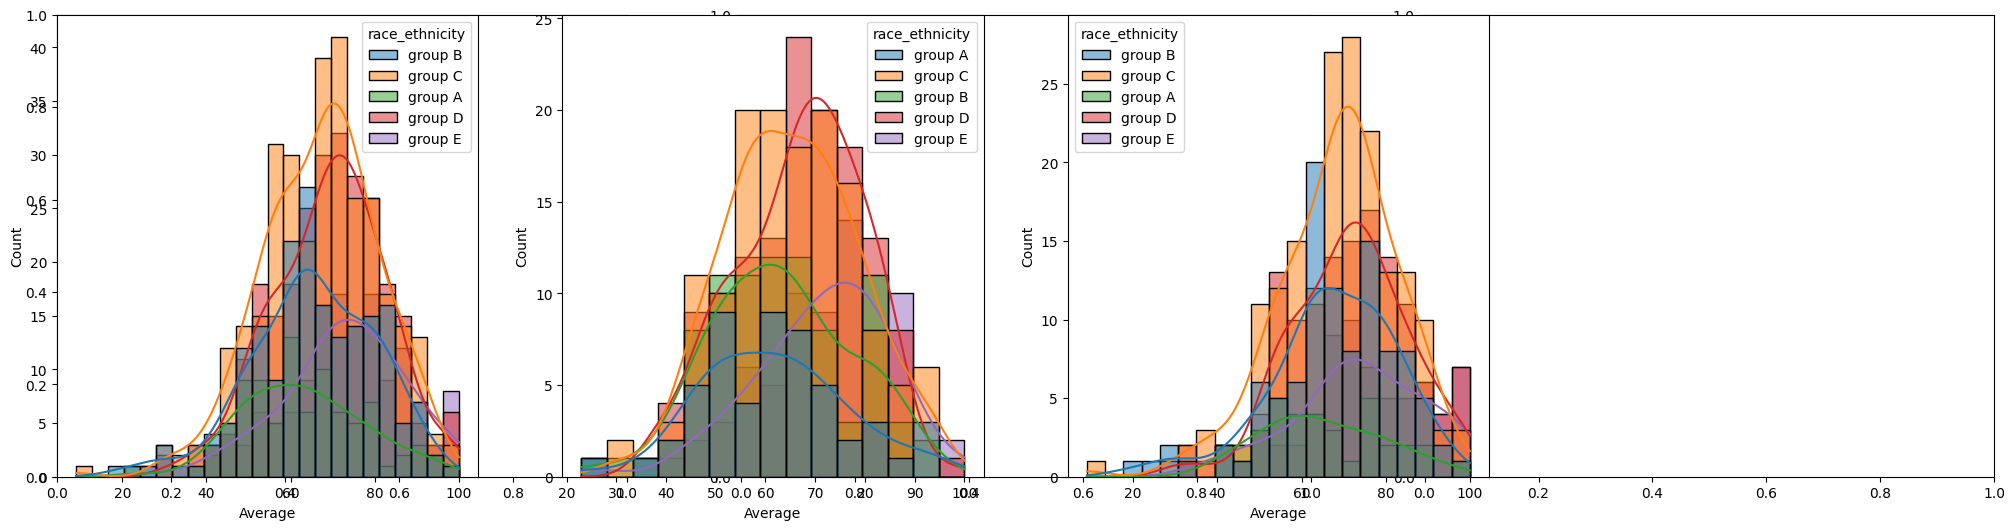

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

Maximum score of students in alll three  subjects

<Axes: title={'center': 'Writing Score'}, ylabel='writing_score'>

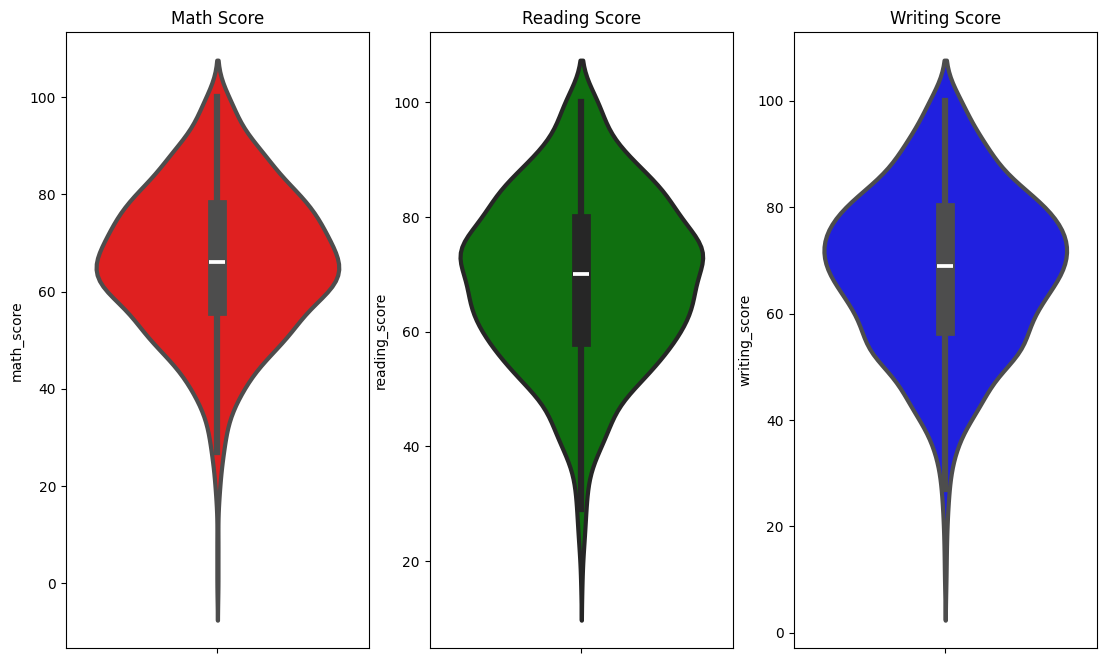

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)

plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)

Multivariate analysis using pieplot

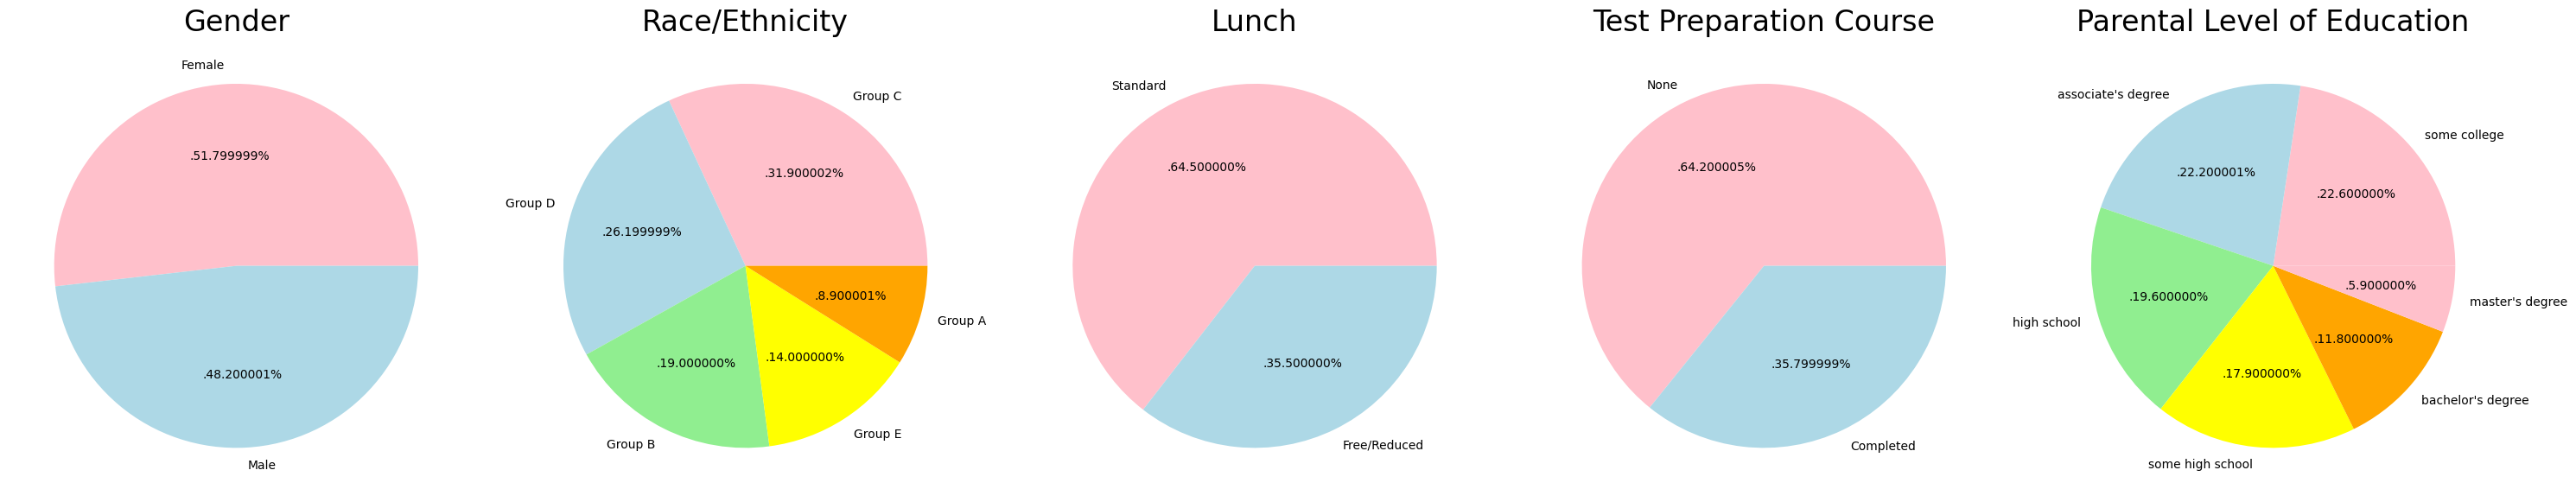

In [43]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['pink','lightblue']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Gender",fontsize=24)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['pink','lightblue','lightgreen','yellow','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Race/Ethnicity",fontsize=24)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='Standard','Free/Reduced'
color=['pink','lightblue']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Lunch",fontsize=24)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='None','Completed'
color=['pink','lightblue']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Test Preparation Course",fontsize=24)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels='Some College','Associate Degree',"Bachelor's Degree","Master's Degree","High School"
color=['pink','lightblue','lightgreen','yellow','orange']

plt.pie(size.values,colors=color,labels=size.index,autopct='.%2f%%')
plt.title("Parental Level of Education",fontsize=24)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Feature Wise Visualization

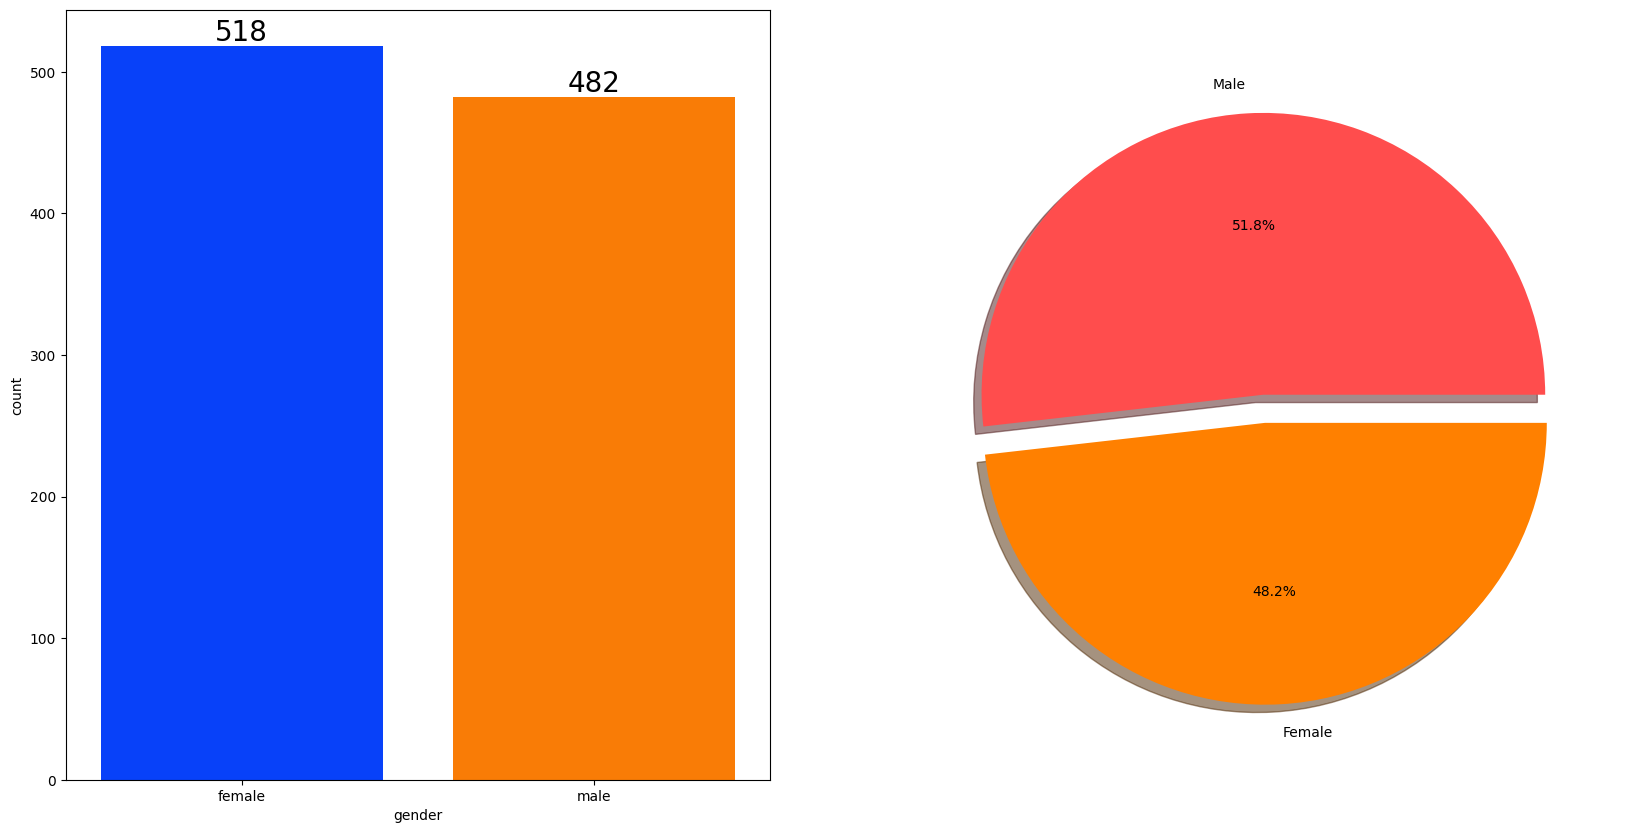

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df, palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],
autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Bivariate Analysis (Is gender has any impact on student's performance ?)

In [49]:
gender_group = df.groupby('gender').mean(numeric_only=True)

gender_group

,math_score,reading_score,writing_score,Total Score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


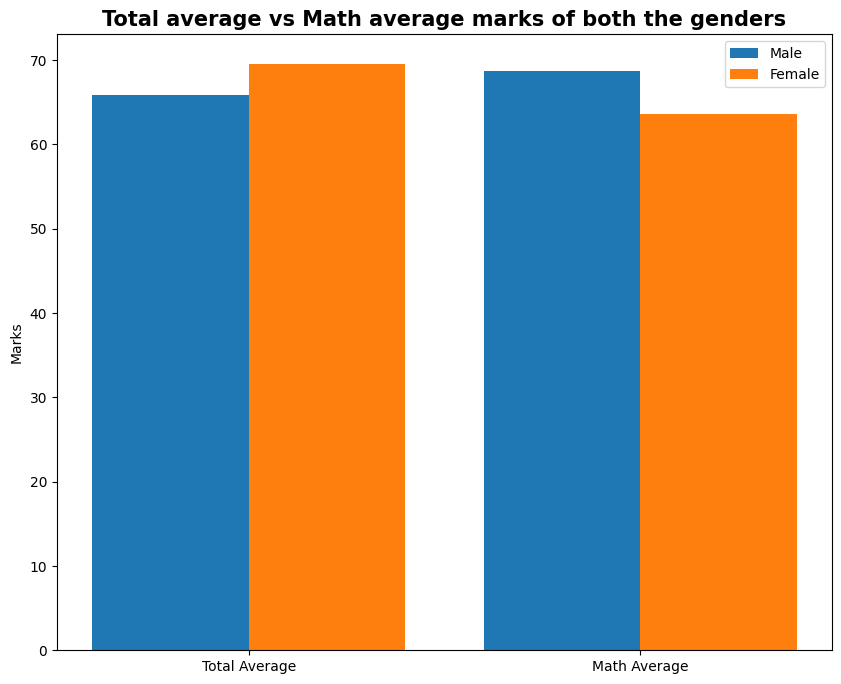

In [56]:
import numpy as np
plt.figure(figsize=(10,8))
x=['Total Average','Math Average']

female_scores=[gender_group['Average'][0],gender_group['math_score'][0]]
male_scores=[gender_group['Average'][1],gender_group['math_score'][1]]

X_axis = np.arange(len(x))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis,x)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both the genders",fontweight='bold',fontsize='15')
plt.legend()
plt.show()

Univariate Analysis

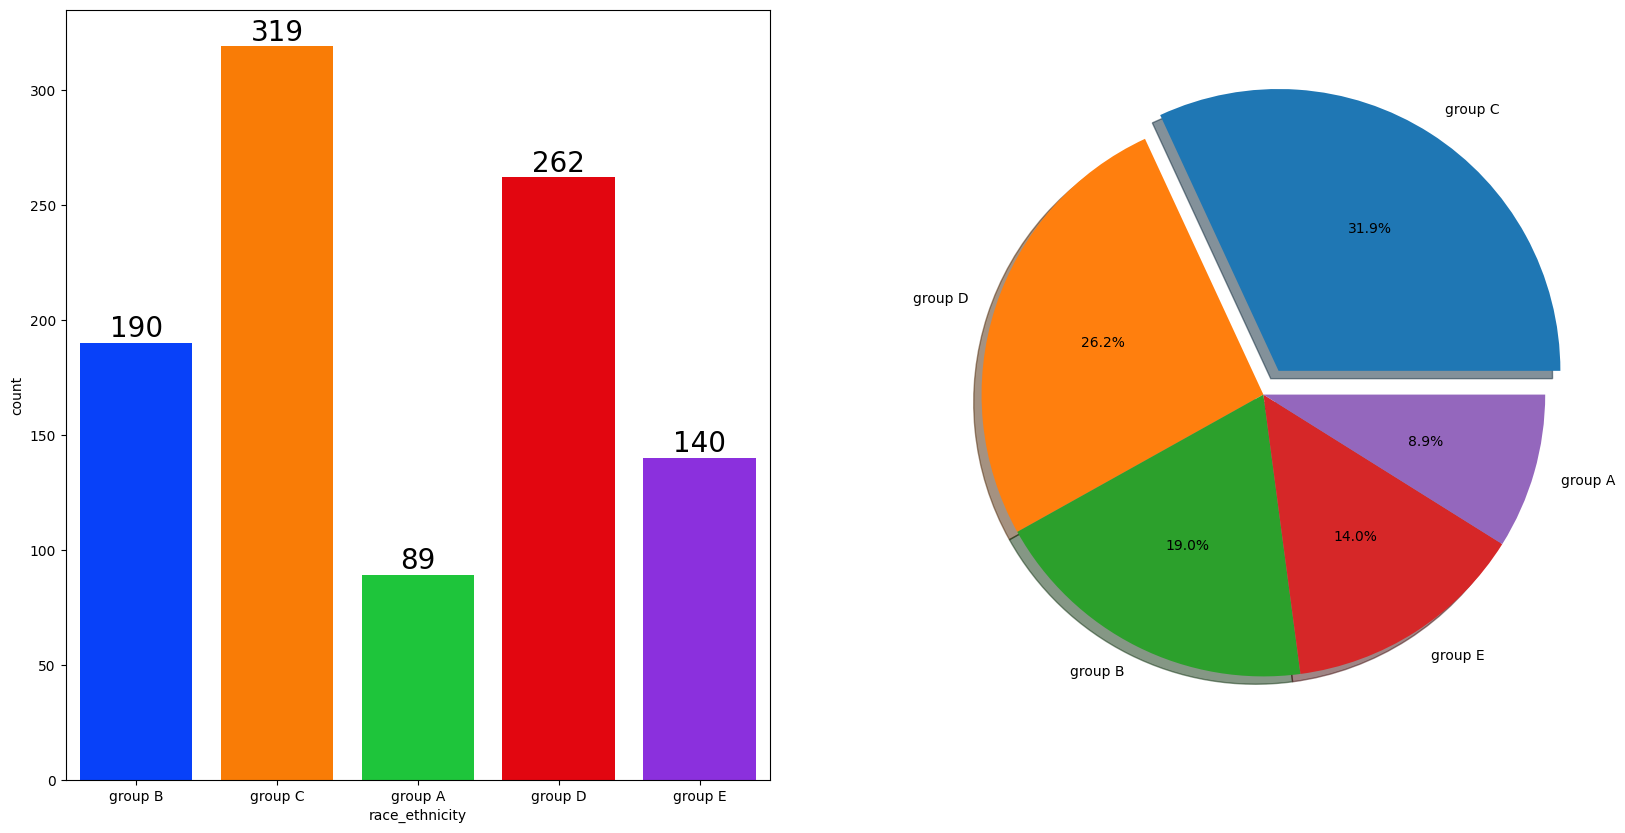

In [58]:
f, ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'], data=df,
              palette='bright',ax=ax[0],saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,
        explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Bivariate analysis (compare two features)

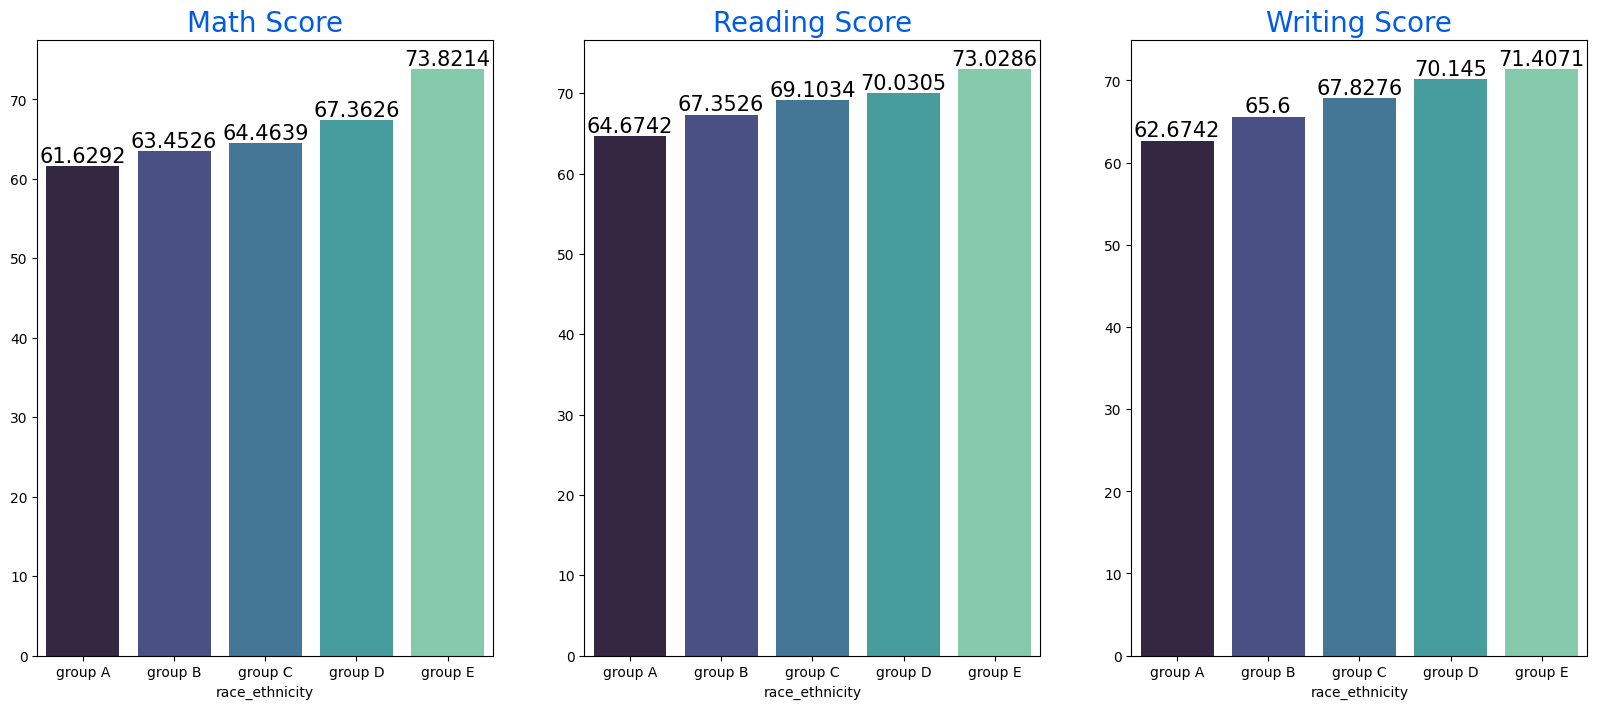

In [61]:
group_data=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data['math_score'].mean().index,
            y=group_data['math_score'].mean().values,
            palette='mako',ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data['reading_score'].mean().index,
            y=group_data['reading_score'].mean().values,
            palette='mako',ax=ax[1])
ax[1].set_title('Reading Score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data['writing_score'].mean().index,
            y=group_data['writing_score'].mean().values,
            palette='mako',ax=ax[2])
ax[2].set_title('Writing Score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

plt.show()

Parenst level of education - Univariate Analysis

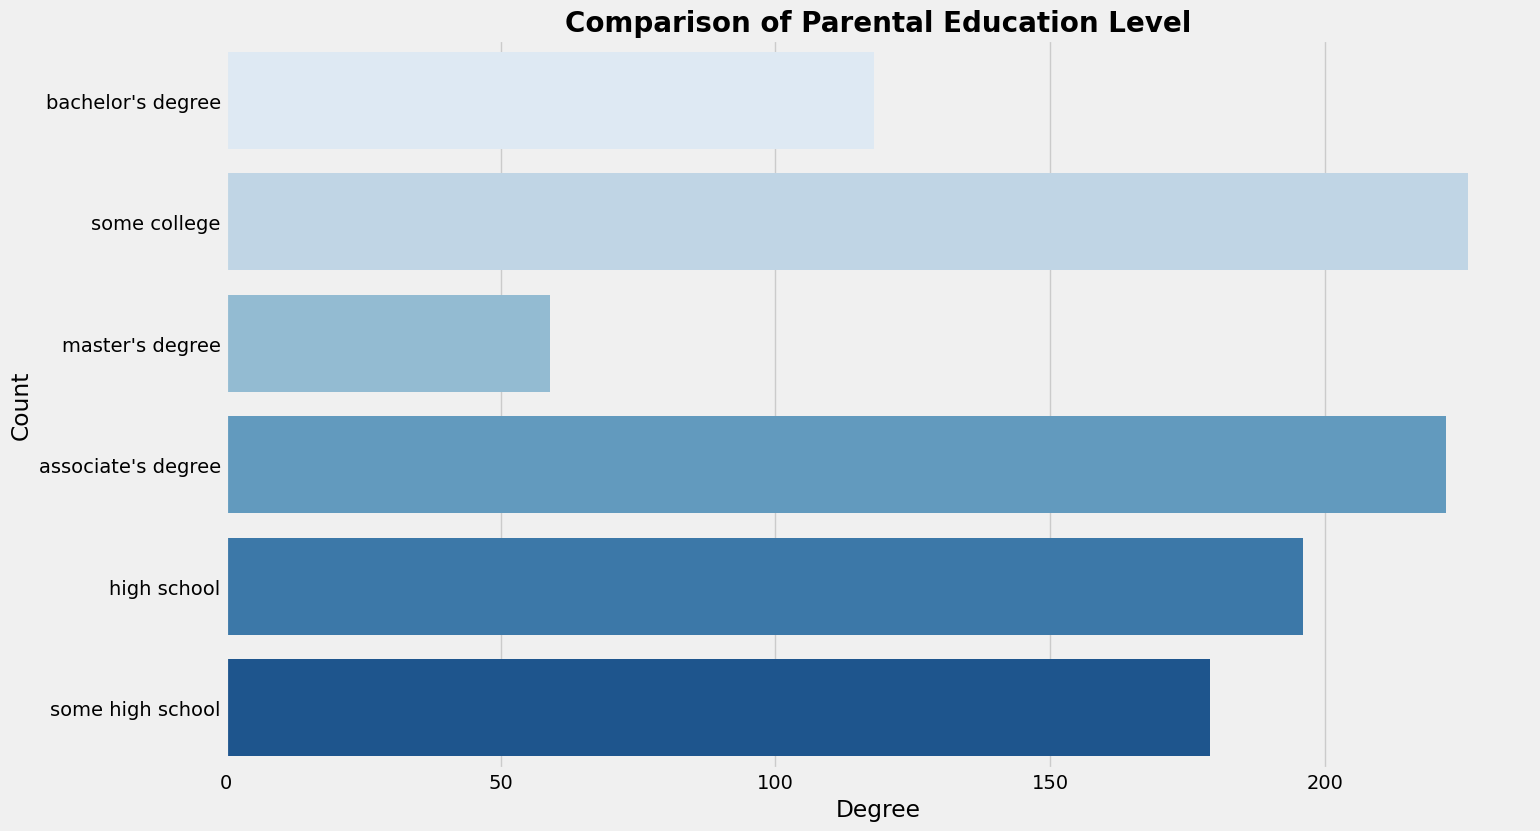

In [63]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Comparison of Parental Education Level',fontweight='bold',fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

Test Preparation - Bivariate Analysis

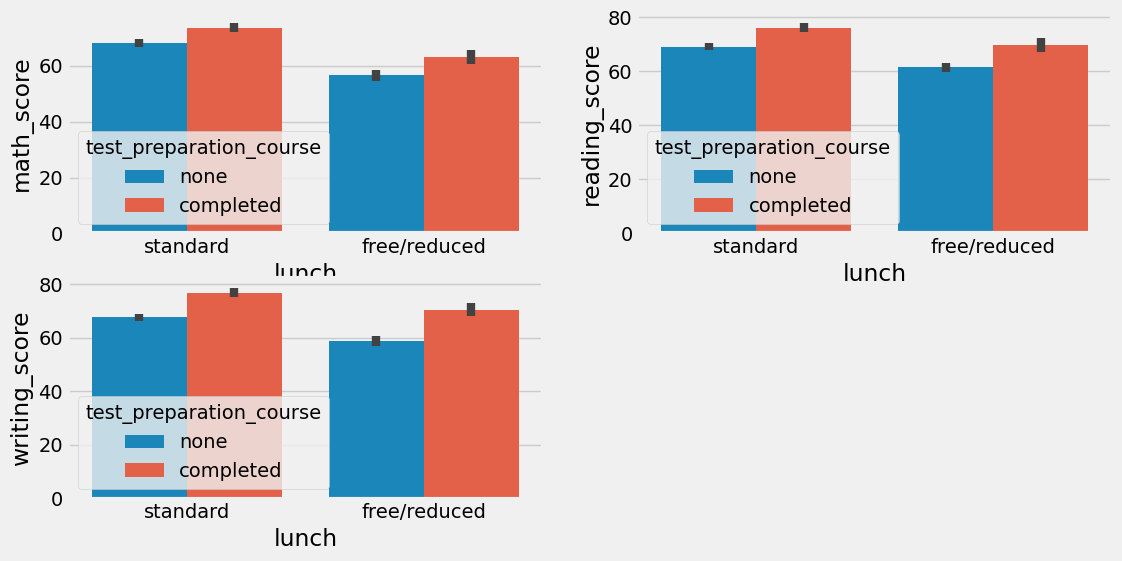

In [64]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.show()

Check Outliers

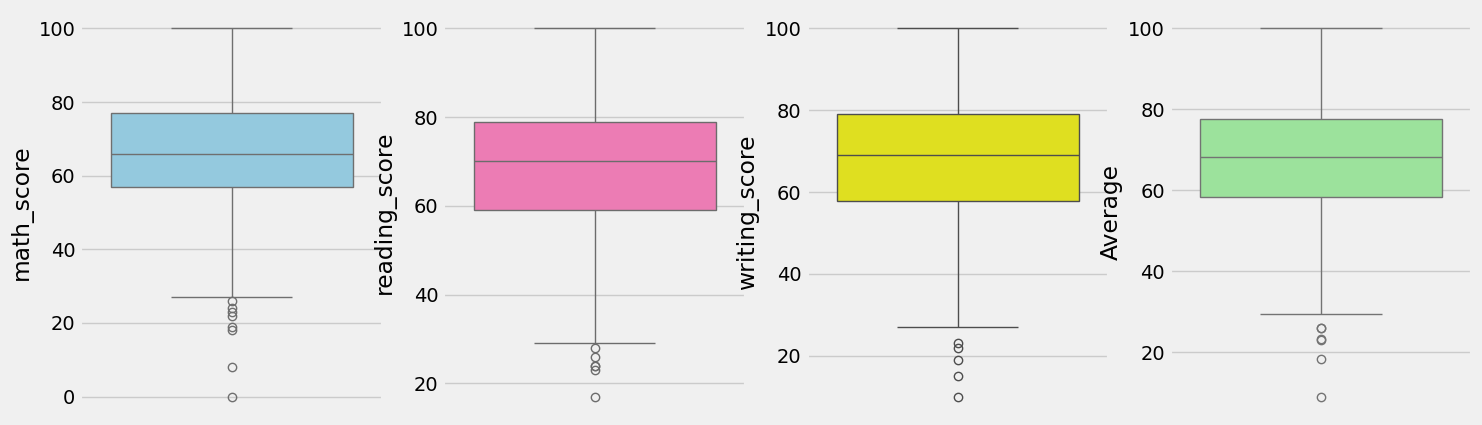

In [69]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

Multivariate Analysis using pairPLot

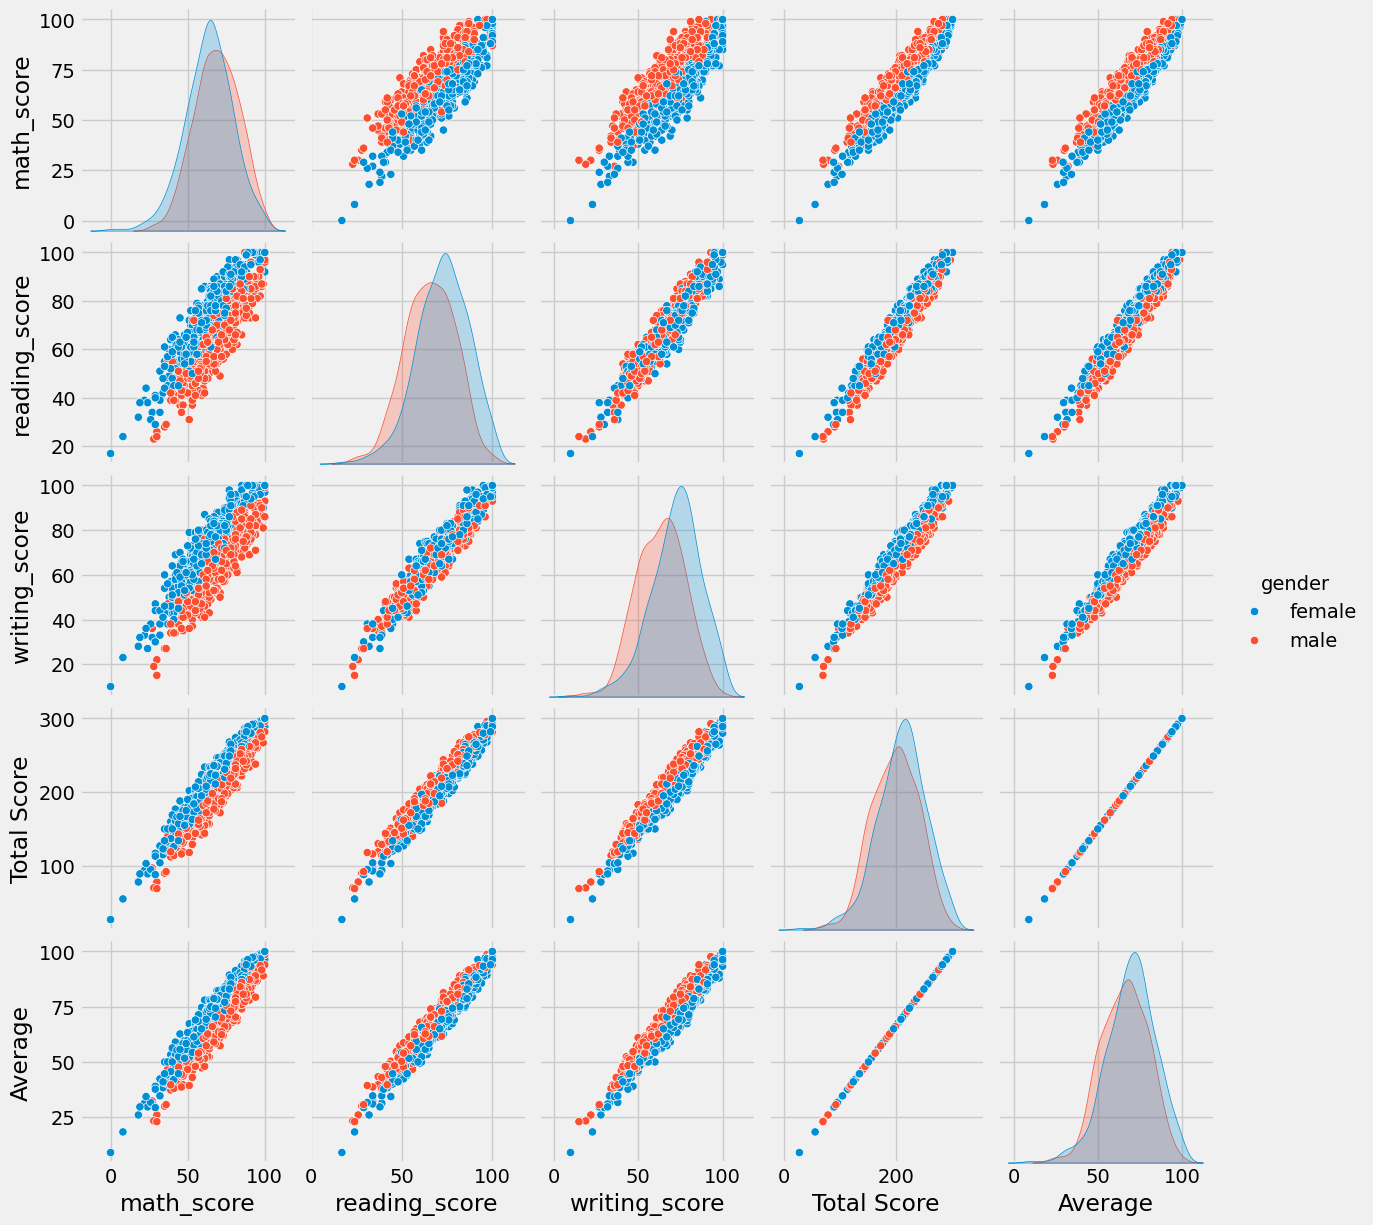

In [70]:
sns.pairplot(df,hue='gender')
plt.show()